Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [474]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
import matplotlib.pyplot as plt
import seaborn as sns
yelp = pd.read_csv('yelp.csv')
foursquare = pd.read_csv('foursquare.csv')
city_bikes = pd.read_csv('milan.csv')

In [451]:
# Cleanup any funny stuff when converted to csv
foursquare = foursquare.drop(columns=['Unnamed: 0', 'index'])
yelp = yelp.drop(columns=['Unnamed: 0'])



In [452]:
# Merge the DataFrames on 'longitude' and 'latitude' using an outer join
df_main = pd.merge(yelp, foursquare, on=['longitude', 'latitude'], how='outer')
df_main


,name_x,latitude,longitude,address_x,category_x,rating_x,name_y,address_y,category_y,rating_y
0,NaN,45.509085,9.083003,NaN,NaN,NaN,Bar dell'oratorio,Piazza della Visitazione 1,Café,NaN
1,Confezioni di Serra Francesca,45.512310,9.084340,"Via Orti, 2, 20016 Pero, Italy",Fashion,0.0,NaN,NaN,NaN,NaN
2,Confezioni di Serra Francesca,45.512310,9.084340,"Via Orti, 2, 20016 Pero, Italy",Fashion,0.0,NaN,NaN,NaN,NaN
3,Confezioni di Serra Francesca,45.512310,9.084340,"Via Orti, 2, 20016 Pero, Italy",Fashion,0.0,NaN,NaN,NaN,NaN
4,NaN,45.510678,9.085270,NaN,NaN,NaN,Baby Boom,Via Curiel 12,Children's Clothing Store,NaN
...,...,...,...,...,...,...,...,...,...,...
7676,Delsey Italia,45.572310,9.335480,"Via Bartolomeo Colleoni, 13, 20041 Agrate Bria...",Leather Goods,0.0,NaN,NaN,NaN,NaN
7677,Delsey Italia,45.572310,9.335480,"Via Bartolomeo Colleoni, 13, 20041 Agrate Bria...",Leather Goods,0.0,NaN,NaN,NaN,NaN
7678,Prenatal,45.575030,9.337080,"Via Bartolomeo Colleoni, 1, 20041 Agrate Brian...",Maternity Wear,0.0,NaN,NaN,NaN,NaN
7679,Prenatal,45.575030,9.337080,"Via Bartolomeo Colleoni, 1, 20041 Agrate Brian...",Maternity Wear,0.0,NaN,NaN,NaN,NaN


In [453]:
#Clean up, clean up! lets look at the data, lets start with the shape
print(df_main.shape)

(7681, 10)


In [454]:
# Lets look at the data types
df_main.dtypes

name_x         object
latitude      float64
longitude     float64
address_x      object
category_x     object
rating_x      float64
name_y         object
address_y      object
category_y     object
rating_y      float64
dtype: object

In [458]:
# # Delete the rows with null values from the lat and lon and address as one row won't affect our work
df_main[['address_x', 'address_y']].fillna('', inplace=True)
df_main['latitude'].fillna(0, inplace=True)
df_main['longitude'].fillna(0, inplace=True) 
#df_main[['rating_x', 'rating_y']].fillna(0, inplace=True) # changing nulls to 0 as I don't thing I'll be using rating for my modelling
df_main[['category_x', 'category_y']].fillna('', inplace=True)
# df_main

/var/folders/2m/_3np4g752dzdn21lzc5c7nsm0000gn/T/ipykernel_31824/4205615336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main[['address_x', 'address_y']].fillna('', inplace=True)
/var/folders/2m/_3np4g752dzdn21lzc5c7nsm0000gn/T/ipykernel_31824/4205615336.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['latitude'].fillna(0

In [459]:
# Fill in any missing values
null_values = df_main.isnull().sum()
print(null_values)

name_x        1265
latitude         0
longitude        0
address_x     1265
category_x    1265
rating_x      1265
name_y        6416
address_y     6417
category_y    6416
rating_y      7467
dtype: int64


In [460]:
# Lets drop any duplicate stores from each API query
df_main = df_main.drop_duplicates(subset=['name_x', 'name_y'])
df_main.head()


,name_x,latitude,longitude,address_x,category_x,rating_x,name_y,address_y,category_y,rating_y
0,NaN,45.509085,9.083003,NaN,NaN,NaN,Bar dell'oratorio,Piazza della Visitazione 1,Café,NaN
1,Confezioni di Serra Francesca,45.512310,9.084340,"Via Orti, 2, 20016 Pero, Italy",Fashion,0.0,NaN,NaN,NaN,NaN
4,NaN,45.510678,9.085270,NaN,NaN,NaN,Baby Boom,Via Curiel 12,Children's Clothing Store,NaN
5,NaN,45.508488,9.085850,NaN,NaN,NaN,Bar via Greppi,Via Greppi 12,"Bar, Café, Restaurant",NaN
6,NaN,45.503764,9.086863,NaN,NaN,NaN,Idealbox Box Doccia Derby Box,Via Giovanni Keplero 4,Fashion Accessories Store,NaN


In [461]:
# Taking just lat and lon col then using haversine_distances to set a matrix of nearest lat, lon to each bike station
city_lat_lon = city_bikes[['latitude', 'longitude']]
df_main_lat_lon = df_main[['latitude', 'longitude']]

D = haversine_distances(df_main_lat_lon, city_lat_lon)
print(D.shape)


(2480, 322)


In [462]:
# Create an array of the matrix
D_index = np.argsort(D, axis=1)
print(D_index.shape)
D_index[:,0]

(2480, 322)


array([170, 200, 200, ...,  58,  58,  58])

In [463]:
# using iloc to find the array values
city_bike_iloc = city_bikes.iloc[D_index[:,0], :].reset_index()

In [464]:
# concat the df_main and city_bike_iloc df
all_merged = pd.concat([df_main, city_bike_iloc], axis=1)
all_merged.head()

,name_x,latitude,longitude,address_x,category_x,rating_x,name_y,address_y,category_y,rating_y,index,Unnamed: 0,name,longitude,latitude,timestamp,free_bikes,empty_slots,total_slots
0,NaN,45.509085,9.083003,NaN,NaN,NaN,Bar dell'oratorio,Piazza della Visitazione 1,Café,NaN,170.0,170.0,500 - Cascina Merlata - UpTown,9.103392,45.507202,2025-02-07T23:19:44.932012Z,14.0,14.0,30.0
1,Confezioni di Serra Francesca,45.512310,9.084340,"Via Orti, 2, 20016 Pero, Italy",Fashion,0.0,NaN,NaN,NaN,NaN,200.0,200.0,501 - Cascina Merlata - Social Village,9.100762,45.511625,2025-02-07T23:19:44.931995Z,20.0,7.0,30.0
4,NaN,45.510678,9.085270,NaN,NaN,NaN,Baby Boom,Via Curiel 12,Children's Clothing Store,NaN,234.0,234.0,334 - Molino Dorino M1,9.094346,45.505083,2025-02-07T23:19:44.933295Z,2.0,24.0,30.0
5,NaN,45.508488,9.085850,NaN,NaN,NaN,Bar via Greppi,Via Greppi 12,"Bar, Café, Restaurant",NaN,200.0,200.0,501 - Cascina Merlata - Social Village,9.100762,45.511625,2025-02-07T23:19:44.931995Z,20.0,7.0,30.0
6,NaN,45.503764,9.086863,NaN,NaN,NaN,Idealbox Box Doccia Derby Box,Via Giovanni Keplero 4,Fashion Accessories Store,NaN,200.0,200.0,501 - Cascina Merlata - Social Village,9.100762,45.511625,2025-02-07T23:19:44.931995Z,20.0,7.0,30.0


In [465]:
# Groupby and aggregate the name and rating col 
all_merged_grouped = all_merged.groupby(by='name', as_index=False).agg({'name_x': 'count',
                                                                        'name_y': 'count',
                                                                        'rating_x': 'mean',
                                                                        'rating_y': 'mean'})
all_merged_grouped



,name,name_x,name_y,rating_x,rating_y
0,1 - Duomo,2,2,4.000000,6.85
1,10 - Missori,1,1,4.500000,NaN
2,100 - Palazzo Marino - Caserotte,3,2,1.666667,7.40
3,101 - Gadio - Paleocapa,0,0,NaN,NaN
4,102 - Arcivescovado,3,2,0.000000,NaN
...,...,...,...,...,...
307,98 - San Marco,2,1,1.500000,NaN
308,99 - Arco della Pace 1 - Bertani,1,0,0.000000,NaN
309,V1 - Apulejo - Campania,0,1,NaN,NaN
310,V2 - Hajech,0,2,NaN,NaN


In [466]:
# Merge city_bikes and all_merged_group
total = pd.merge(city_bikes, all_merged_grouped, on='name')
total

,Unnamed: 0,name,longitude,latitude,timestamp,free_bikes,empty_slots,total_slots,name_x,name_y,rating_x,rating_y
0,0,368 - Tolstoi - Lorenteggio,9.149430,45.453710,2025-02-07T23:19:44.932063Z,20,8,30,1,1,3.000000,NaN
1,1,25 - Centrale 1,9.202572,45.485456,2025-02-07T23:19:44.938124Z,12,8,24,0,1,NaN,NaN
2,2,161 - Coni Zugna - Solari,9.168010,45.457079,2025-02-07T23:19:44.936019Z,27,4,36,3,2,0.000000,NaN
3,3,16 - Moscova,9.184560,45.477534,2025-02-07T23:19:44.938271Z,12,10,24,0,5,NaN,NaN
4,4,359 - Tertulliano - Caroncini,9.218048,45.449209,2025-02-07T23:19:44.932234Z,18,5,27,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
307,317,185 - Santissima Trinità,9.176445,45.478022,2025-02-07T23:19:44.936201Z,24,5,36,3,0,2.333333,NaN
308,318,64 - Diaz,9.189676,45.462064,2025-02-07T23:19:44.937278Z,3,29,39,1,1,4.500000,NaN
309,319,173 - Vercelli - Cherubini,9.159315,45.466847,2025-02-07T23:19:44.935708Z,21,13,36,1,4,2.000000,NaN
310,320,98 - San Marco,9.189180,45.478693,2025-02-07T23:19:44.937082Z,3,17,24,2,1,1.500000,NaN


In [467]:
# Create a col of the total rating which is a mean of the Yelp and Foursquare reviews
total_mean = np.nanmean(total[['rating_x', 'rating_y']].values, axis=1)
total['rating_mean'] = total_mean
total

/var/folders/2m/_3np4g752dzdn21lzc5c7nsm0000gn/T/ipykernel_31824/4012500063.py:2: RuntimeWarning: Mean of empty slice
  total_mean = np.nanmean(total[['rating_x', 'rating_y']].values, axis=1)


,Unnamed: 0,name,longitude,latitude,timestamp,free_bikes,empty_slots,total_slots,name_x,name_y,rating_x,rating_y,rating_mean
0,0,368 - Tolstoi - Lorenteggio,9.149430,45.453710,2025-02-07T23:19:44.932063Z,20,8,30,1,1,3.000000,NaN,3.000000
1,1,25 - Centrale 1,9.202572,45.485456,2025-02-07T23:19:44.938124Z,12,8,24,0,1,NaN,NaN,NaN
2,2,161 - Coni Zugna - Solari,9.168010,45.457079,2025-02-07T23:19:44.936019Z,27,4,36,3,2,0.000000,NaN,0.000000
3,3,16 - Moscova,9.184560,45.477534,2025-02-07T23:19:44.938271Z,12,10,24,0,5,NaN,NaN,NaN
4,4,359 - Tertulliano - Caroncini,9.218048,45.449209,2025-02-07T23:19:44.932234Z,18,5,27,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,317,185 - Santissima Trinità,9.176445,45.478022,2025-02-07T23:19:44.936201Z,24,5,36,3,0,2.333333,NaN,2.333333
308,318,64 - Diaz,9.189676,45.462064,2025-02-07T23:19:44.937278Z,3,29,39,1,1,4.500000,NaN,4.500000
309,319,173 - Vercelli - Cherubini,9.159315,45.466847,2025-02-07T23:19:44.935708Z,21,13,36,1,4,2.000000,NaN,2.000000
310,320,98 - San Marco,9.189180,45.478693,2025-02-07T23:19:44.937082Z,3,17,24,2,1,1.500000,NaN,1.500000


In [468]:
# Mathematically add 'name_x' and 'name_y' columns
total['venue'] = total['name_x'] + total['name_y']
total = total.drop(columns = 'Unnamed: 0')
total = total.drop(columns = ['rating_x', 'rating_y'])
total = total.drop(columns = ['name_x', 'name_y'])
total

,name,longitude,latitude,timestamp,free_bikes,empty_slots,total_slots,rating_mean,venue
0,368 - Tolstoi - Lorenteggio,9.149430,45.453710,2025-02-07T23:19:44.932063Z,20,8,30,3.000000,2
1,25 - Centrale 1,9.202572,45.485456,2025-02-07T23:19:44.938124Z,12,8,24,NaN,1
2,161 - Coni Zugna - Solari,9.168010,45.457079,2025-02-07T23:19:44.936019Z,27,4,36,0.000000,5
3,16 - Moscova,9.184560,45.477534,2025-02-07T23:19:44.938271Z,12,10,24,NaN,5
4,359 - Tertulliano - Caroncini,9.218048,45.449209,2025-02-07T23:19:44.932234Z,18,5,27,NaN,0
...,...,...,...,...,...,...,...,...,...
307,185 - Santissima Trinità,9.176445,45.478022,2025-02-07T23:19:44.936201Z,24,5,36,2.333333,3
308,64 - Diaz,9.189676,45.462064,2025-02-07T23:19:44.937278Z,3,29,39,4.500000,2
309,173 - Vercelli - Cherubini,9.159315,45.466847,2025-02-07T23:19:44.935708Z,21,13,36,2.000000,5
310,98 - San Marco,9.189180,45.478693,2025-02-07T23:19:44.937082Z,3,17,24,1.500000,3


In [470]:
total.dtypes

name            object
longitude      float64
latitude       float64
timestamp       object
free_bikes       int64
empty_slots      int64
total_slots      int64
rating_mean    float64
venue            int64
dtype: object

In [472]:
# Convert the 'timestamp' column to datetime
total['timestamp'] = pd.to_datetime(total['timestamp'])


In [473]:
# Look at the desription of the dataframe
total.describe()

,longitude,latitude,free_bikes,empty_slots,total_slots,rating_mean,venue
count,312.000000,312.000000,312.000000,312.000000,312.000000,222.000000,312.000000
mean,9.186297,45.472252,15.746795,11.653846,29.413462,2.862881,2.983974
std,0.025681,0.018111,8.056273,7.269859,5.211187,1.977452,2.692684
min,9.094346,45.436977,0.000000,0.000000,15.000000,0.000000,0.000000
25%,9.169738,45.458582,9.000000,5.750000,24.000000,1.483333,1.000000
50%,9.189315,45.470198,16.000000,11.000000,30.000000,3.000000,2.000000
75%,9.205649,45.484377,22.000000,17.000000,36.000000,4.142500,4.000000
max,9.236777,45.526812,35.000000,33.000000,39.000000,8.100000,22.000000


From this we can see that we only have 222 out of 311 ratings<br>
We see that we have some 0 venues around some number of our stations<br>
We see that one or more of our stations has 22 venues located around it, probably downtown<br>
We see that the mean amount of venues per station is 3.<br>


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: xlabel='free_bikes', ylabel='Count'>

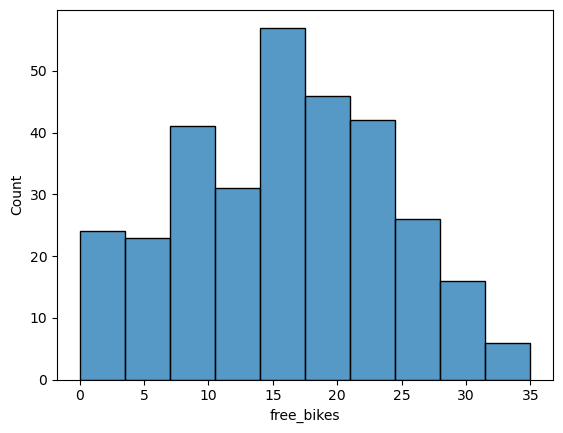

In [475]:
# histogram of our target for modelling
sns.histplot(total['free_bikes'])

This Histogram shows us that most stations (50+) have 15 free_bikes at that given time<br>
We can also see that there is a normal distribution present from 0 to 35 free_bikes

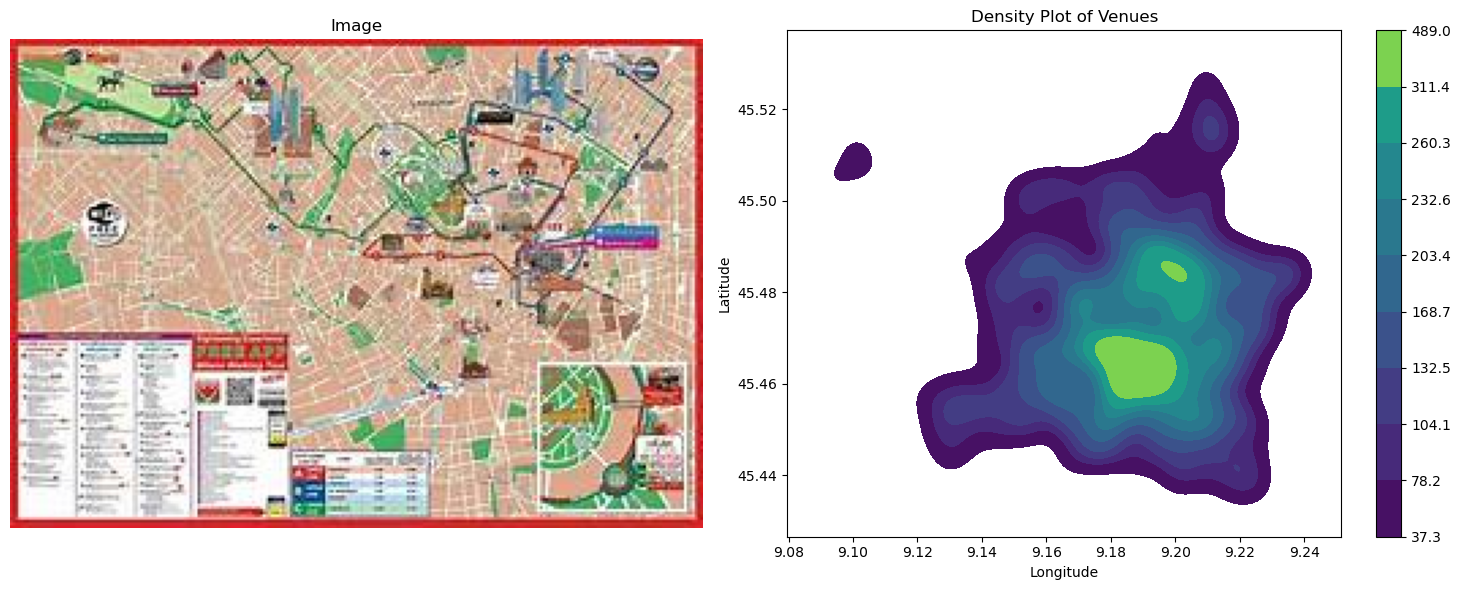

In [496]:
import matplotlib.image as mpimg
# Density plot of most venues based on lat and lon
# Load the image
img = mpimg.imread('/Users/blairjdaniel/lighthouse/lighthouse/statistical_project/Statistical-Modelling-Project/milan.jpeg')  # Replace with the path to your image file

# Create a subplot layout with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the image on the first subplot
axes[0].imshow(img)
axes[0].set_title('Image')
axes[0].axis('off')  # Hide the axis

# Plot the density plot on the second subplot
sns.kdeplot(
    data=total,
    x='longitude', y='latitude',
    fill=True, cmap='viridis',
    bw_adjust=0.5, cbar=True, alpha=1, ax=axes[1]  # Adjust alpha for transparency
)
axes[1].set_title('Density Plot of Venues')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

# Display the plots
plt.tight_layout()
plt.show()


This density map shows us the obvious thing that, the most venues are located downtown, with another cluster near the horse track<br>
From these maps, we can surmise that the most free bikes will be closer to the center of downtown.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [505]:
# Create and load in the data for a SQL table
import sqlite3

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('bike_station.db')
cursor = conn.cursor()

# Create the name table
cursor.execute('''
CREATE TABLE IF NOT EXISTS name (
    name_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    free_bikes INTEGER,
    empty_slots INTEGER,
    total_slots INTEGER
)
''')

# Create the Geocode table
cursor.execute('''
CREATE TABLE IF NOT EXISTS geocode (
    geocode_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name_id INTEGER,
    latitude REAL,
    longitude REAL,
    FOREIGN KEY (name_id) REFERENCES name (name_id)
)
''')

# Create the venue table
cursor.execute('''
CREATE TABLE IF NOT EXISTS venue (
    venue_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name_id INTEGER,
    rating_mean REAL,
    venue TEXT,
    FOREIGN KEY (name_id) REFERENCES name (name_id)
)
''')

# Insert data into the name table
for _, row in total.iterrows():
    cursor.execute('''
    INSERT INTO name (name, free_bikes, empty_slots, total_slots)
    VALUES (?, ?, ?, ?)
    ''', (row['name'], row['free_bikes'], row['empty_slots'], row['total_slots']))

# Get the name_id for each row and insert data into the Geocode and venue tables
for _, row in total.iterrows():
    cursor.execute('SELECT name_id FROM name WHERE name = ?', (row['name'],))
    name_id = cursor.fetchone()[0]
    
    cursor.execute('''
    INSERT INTO geocode (name_id, latitude, longitude)
    VALUES (?, ?, ?)
    ''', (name_id, row['latitude'], row['longitude']))
    
    cursor.execute('''
    INSERT INTO venue (name_id, rating_mean, venue)
    VALUES (?, ?, ?)
    ''', (name_id, row['rating_mean'], row['venue']))

# Commit the changes and close the connection
conn.commit()
conn.close()


In [520]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('bike_station.db')
cursor = conn.cursor()

# Perform a SQL query to join the venue and name tables
name_to_search = '184 - Porta Volta'
query = f'''
SELECT v.venue, n.name, n.free_bikes, n.empty_slots, n.total_slots, g.latitude, g.longitude
FROM venue v
JOIN name n ON v.name_id = n.name_id
JOIN geocode g ON n.name_id = g.name_id
WHERE n.name = '{name_to_search}'
'''

cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert the results to a DataFrame for better readability
columns = ['venue', 'name', 'free_bikes', 'empty_slots', 'total_slots', 'latitude', 'longitude']
results_df = pd.DataFrame(results, columns=columns)

print(results_df)

# Close the connection
conn.close()

  venue               name  free_bikes  empty_slots  total_slots   latitude  \
0     1  184 - Porta Volta          29            4           33  45.480234   
1     1  184 - Porta Volta          29            4           33  45.480234   
2     1  184 - Porta Volta          29            4           33  45.480234   
3     1  184 - Porta Volta          29            4           33  45.480234   

   longitude  
0   9.182309  
1   9.182309  
2   9.182309  
3   9.182309  


Look at the data before and after the join to validate your data.